In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

Load cleaned and encoded datasets

In [2]:

cleaned_path = 'D:\waste_management\data\processed\waste_data_cleaned.csv'
encoded_path = 'D:\waste_management\data\processed\waste_data_encoded.csv'

In [3]:
df_clean = pd.read_csv(cleaned_path)
df_encoded = pd.read_csv(encoded_path)

========== 1. Basic Overview ==========

In [4]:

print("Cleaned Data Info:")
print(df_clean.info())
print("\nSummary Statistics:")
print(df_clean.describe().T)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City/District                      850 non-null    object 
 1   Waste Type                         850 non-null    object 
 2   Waste Generated (Tons/Day)         850 non-null    float64
 3   Recycling Rate (%)                 850 non-null    float64
 4   Population Density (People/km²)    850 non-null    float64
 5   Municipal Efficiency Score (1-10)  850 non-null    float64
 6   Disposal Method                    850 non-null    object 
 7   Cost of Waste Management (₹/Ton)   850 non-null    float64
 8   Awareness Campaigns Count          802 non-null    float64
 9   Landfill Name                      850 non-null    object 
 10  Landfill Capacity (Tons)           850 non-null    float64
 11  Year                               850 

========== 2. Distribution of Target Variable ==========

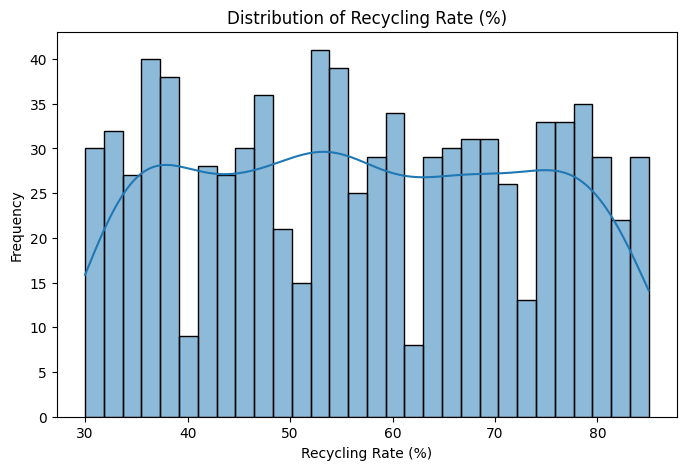

In [5]:

plt.figure(figsize=(8,5))
sns.histplot(df_clean['Recycling Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Recycling Rate (%)')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Frequency')
plt.show()

========== 3. Target vs. Key Categorical Features ==========

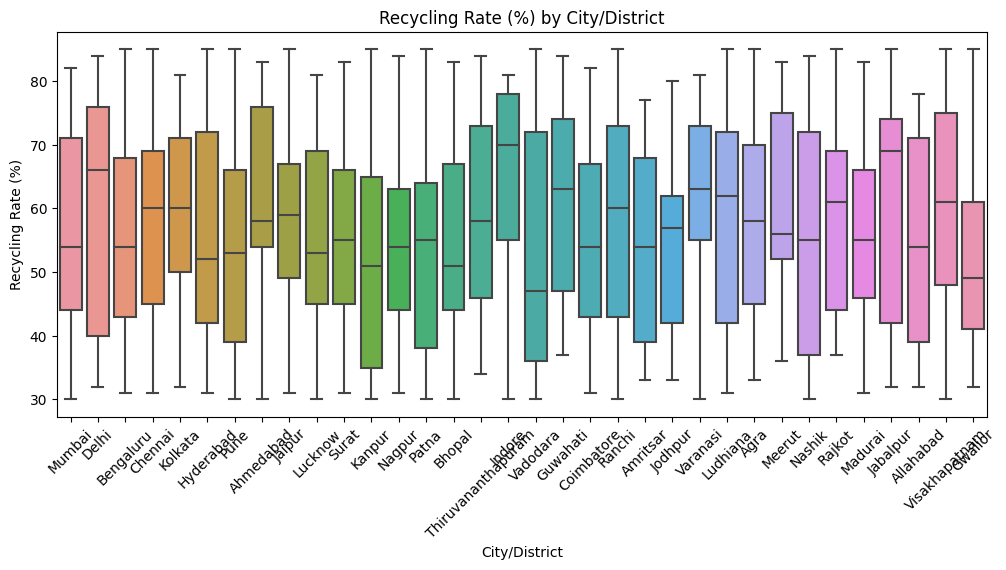

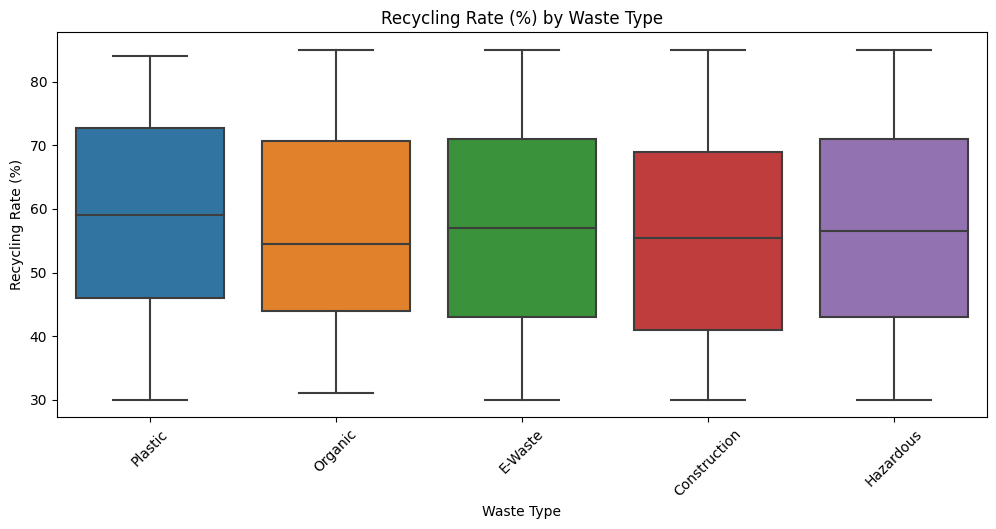

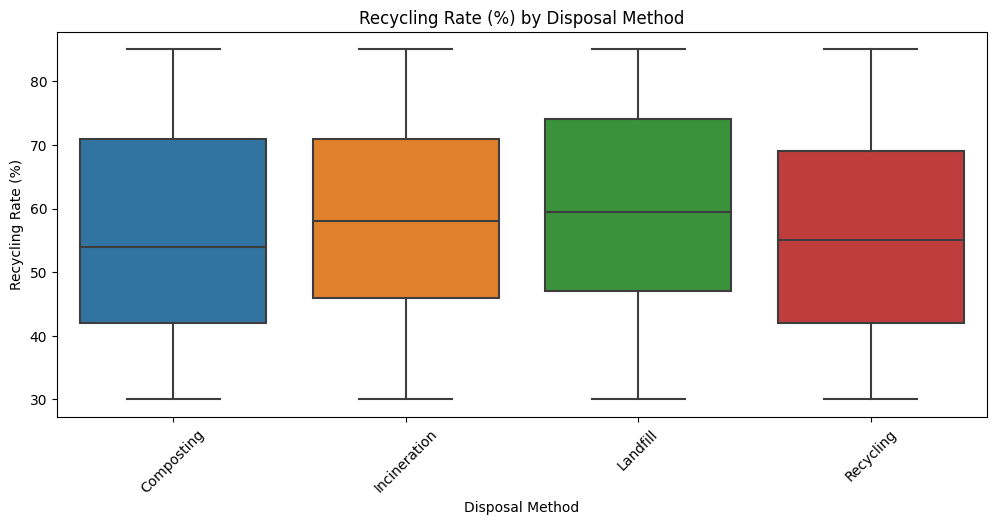

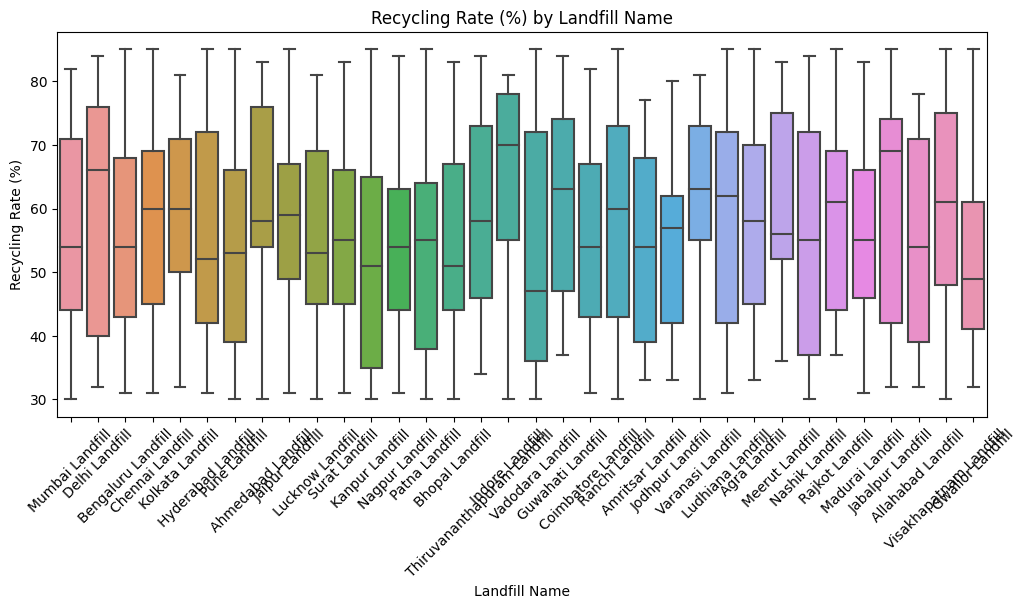

In [6]:

cat_features = ['City/District', 'Waste Type', 'Disposal Method', 'Landfill Name']

for cat in cat_features:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=cat, y='Recycling Rate (%)', data=df_clean)
    plt.xticks(rotation=45)
    plt.title(f'Recycling Rate (%) by {cat}')
    plt.show()

========== 4. Correlation Heatmap of Numeric Features ==========

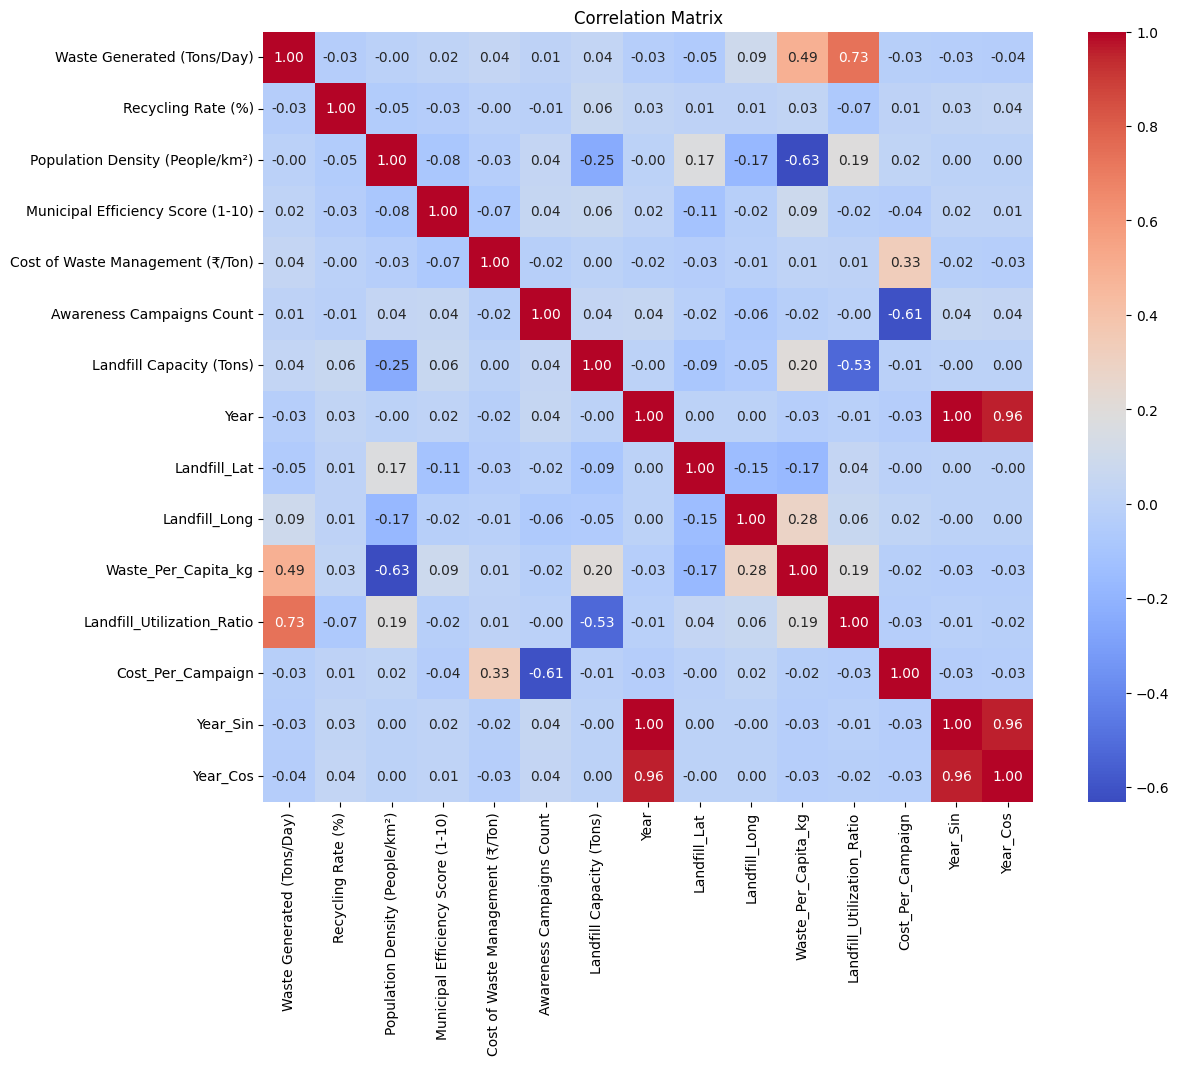

In [7]:

numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14,10))
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

========== 5. Scatter Plots for Strong Correlations ==========

In [8]:
# Identify features highly correlated with target (>0.3 or <-0.3)
target_corr = corr['Recycling Rate (%)'].sort_values(ascending=False)
print("Strong correlations with target:")
print(target_corr[target_corr.abs() > 0.3])

Strong correlations with target:
Recycling Rate (%)    1.0
Name: Recycling Rate (%), dtype: float64


Plot a few such features vs target

In [9]:

features_to_plot = target_corr[target_corr.abs() > 0.3].index.drop('Recycling Rate (%)').tolist()

for feature in features_to_plot:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='Recycling Rate (%)', data=df_clean)
    plt.title(f'Recycling Rate (%) vs {feature}')
    plt.show()

========== 6. Time Trends ==========

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22372\1197125317.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Recycling Rate (%)', data=df_clean, estimator='mean', ci=None)


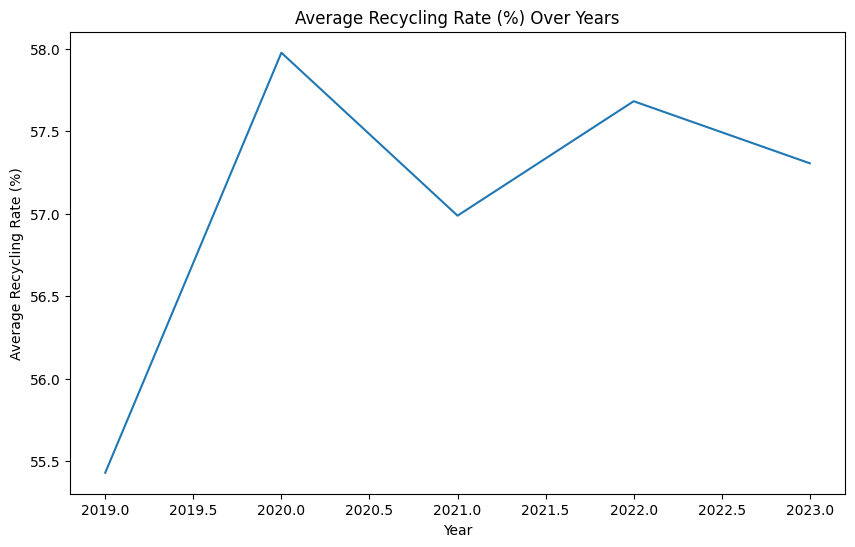

In [10]:
if 'Year' in df_clean.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Year', y='Recycling Rate (%)', data=df_clean, estimator='mean', ci=None)
    plt.title('Average Recycling Rate (%) Over Years')
    plt.ylabel('Average Recycling Rate (%)')
    plt.show()


========== 7. Geospatial Visualization ==========

In [11]:

# Basic map of landfill locations colored by average recycling rate
if {'Landfill_Lat', 'Landfill_Long'}.issubset(df_clean.columns):
    landfill_avg = df_clean.groupby(['Landfill Name','Landfill_Lat','Landfill_Long'], as_index=False)['Recycling Rate (%)'].mean()

    # Center map roughly on the mean lat/lon
    center_lat = landfill_avg['Landfill_Lat'].mean()
    center_long = landfill_avg['Landfill_Long'].mean()

    m = folium.Map(location=[center_lat, center_long], zoom_start=5)

    # Add landfill points with popup recycling rate info and color by rate
    import matplotlib.cm as cm
    import matplotlib.colors as colors

    norm = colors.Normalize(vmin=landfill_avg['Recycling Rate (%)'].min(), vmax=landfill_avg['Recycling Rate (%)'].max())
    colormap = cm.get_cmap('YlGn')

    for _, row in landfill_avg.iterrows():
        color = colors.rgb2hex(colormap(norm(row['Recycling Rate (%)']))[:3])
        folium.CircleMarker(
            location=[row['Landfill_Lat'], row['Landfill_Long']],
            radius=7,
            popup=f"{row['Landfill Name']}: {row['Recycling Rate (%)']:.2f}%",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
        ).add_to(m)

    # Save or display map
    m.save('landfill_recycling_rate_map.html')
    print("Geospatial map saved to 'landfill_recycling_rate_map.html'")

Geospatial map saved to 'landfill_recycling_rate_map.html'


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22372\92253718.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('YlGn')


========== 8. Analysis of Encoded Data ==========

In [12]:
print("\nEncoded Data sample columns:")
print(df_encoded.columns[:20])  # display few encoded columns


Encoded Data sample columns:
Index(['Waste Generated (Tons/Day)', 'Recycling Rate (%)',
       'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)',
       'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count',
       'Landfill Capacity (Tons)', 'Year', 'Landfill_Lat', 'Landfill_Long',
       'Waste_Per_Capita_kg', 'Landfill_Utilization_Ratio',
       'Cost_Per_Campaign', 'Year_Sin', 'Year_Cos', 'City/District_Ahmedabad',
       'City/District_Allahabad', 'City/District_Amritsar',
       'City/District_Bengaluru', 'City/District_Bhopal'],
      dtype='object')


In [13]:
# Check sparsity of encoded categorical features
cat_encoded_cols = [col for col in df_encoded.columns if '_' in col and df_encoded[col].nunique() == 2]
print(f"Number of one-hot encoded categorical columns: {len(cat_encoded_cols)}")

Number of one-hot encoded categorical columns: 73


In [14]:
# Distribution of a few encoded dummy variables
for col in cat_encoded_cols[:5]:
    print(f"\nValue counts for {col}:")
    print(df_encoded[col].value_counts())


Value counts for City/District_Ahmedabad:
0    825
1     25
Name: City/District_Ahmedabad, dtype: int64

Value counts for City/District_Allahabad:
0    825
1     25
Name: City/District_Allahabad, dtype: int64

Value counts for City/District_Amritsar:
0    825
1     25
Name: City/District_Amritsar, dtype: int64

Value counts for City/District_Bengaluru:
0    825
1     25
Name: City/District_Bengaluru, dtype: int64

Value counts for City/District_Bhopal:
0    825
1     25
Name: City/District_Bhopal, dtype: int64


========== 9. Additional Insights ==========

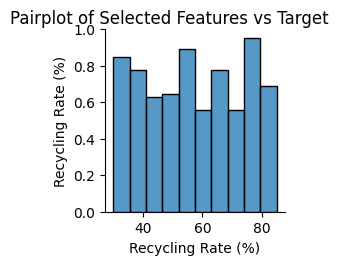

In [15]:

# Pairplot for a few numeric features and target (downsample if large to speed up)
sample_df = df_clean.sample(min(500, len(df_clean)), random_state=42)
sns.pairplot(sample_df, vars=features_to_plot + ['Recycling Rate (%)'])
plt.suptitle('Pairplot of Selected Features vs Target', y=1.02)
plt.show()